In [44]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import scipy.stats
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import os
from datetime import datetime

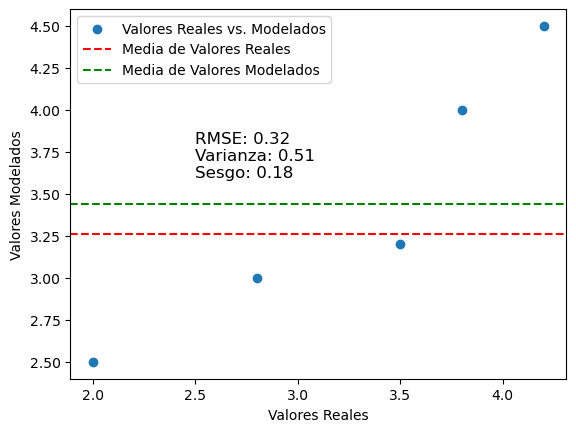

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
predicted_values = np.array([2.5, 3.0, 3.2, 4.0, 4.5])
actual_values = np.array([2.0, 2.8, 3.5, 3.8, 4.2])

# Cálculo del sesgo y la varianza
rmse = np.sqrt(np.mean((predicted_values - actual_values) ** 2))
variance = np.var(predicted_values)
bias = np.mean(predicted_values - actual_values)

# Gráfico de dispersión de valores modelados vs. valores reales
plt.scatter(actual_values, predicted_values, label='Valores Reales vs. Modelados')

# Líneas que representan la varianza y el sesgo
plt.axhline(np.mean(actual_values), color='red', linestyle='--', label='Media de Valores Reales')
plt.axhline(np.mean(predicted_values), color='green', linestyle='--', label='Media de Valores Modelados')

# Etiquetas y leyendas
plt.xlabel('Valores Reales')
plt.ylabel('Valores Modelados')
plt.legend()

# Mostrar el RMSE, varianza y sesgo en el gráfico
plt.text(2.5, 3.8, f'RMSE: {rmse:.2f}', fontsize=12)
plt.text(2.5, 3.7, f'Varianza: {variance:.2f}', fontsize=12)
plt.text(2.5, 3.6, f'Sesgo: {bias:.2f}', fontsize=12)

# Mostrar el gráfico
plt.show()

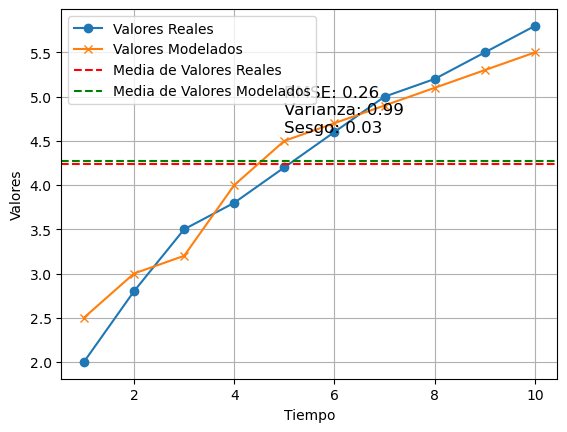

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: valores reales y valores modelados a lo largo del tiempo
time = np.arange(1, 11)  # Ejemplo de series temporales de 10 puntos
actual_values = np.array([2.0, 2.8, 3.5, 3.8, 4.2, 4.6, 5.0, 5.2, 5.5, 5.8])
predicted_values = np.array([2.5, 3.0, 3.2, 4.0, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5])

# Cálculo del RMSE, varianza y sesgo
rmse = np.sqrt(np.mean((predicted_values - actual_values) ** 2))
variance = np.var(predicted_values)
bias = np.mean(predicted_values - actual_values)

# Gráfico de la serie temporal de valores reales y valores modelados
plt.plot(time, actual_values, label='Valores Reales', marker='o')
plt.plot(time, predicted_values, label='Valores Modelados', marker='x')

# Líneas que representan la varianza y el sesgo
plt.axhline(np.mean(actual_values), color='red', linestyle='--', label='Media de Valores Reales')
plt.axhline(np.mean(predicted_values), color='green', linestyle='--', label='Media de Valores Modelados')

# Etiquetas y leyendas
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.legend()

# Mostrar el RMSE, varianza y sesgo en el gráfico
plt.text(5, 5, f'RMSE: {rmse:.2f}', fontsize=12)
plt.text(5, 4.8, f'Varianza: {variance:.2f}', fontsize=12)
plt.text(5, 4.6, f'Sesgo: {bias:.2f}', fontsize=12)

# Mostrar el gráfico
plt.grid(True)
plt.show()

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)
1 2


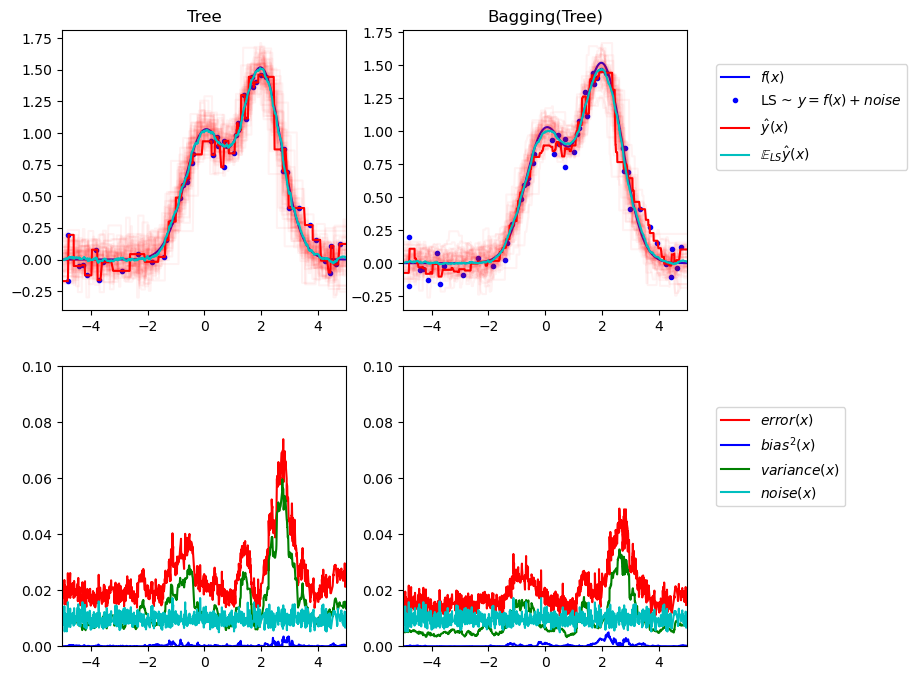

In [175]:
#https://qu4nt.github.io/sklearn-doc-es/auto_examples/ensemble/plot_bias_variance.html
# ejemplo de scikit learn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)


plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)
    # Ecuacion: RMSE^2 = Varianza + Bias2
    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)
    # valores a plotear
    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))
        print(n,n_estimators)

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

In [166]:
def REU_OLS(DF, Pollutant, Units, Lambda = 1, u_xi = 0.0):
    
    #NOTE: Sigma_err_x (NILU notation) is the same as u_xi (GDE2010 notation)
    Sigma_err_x = u_xi
    
    list_u = []
    list_reu = []
    list_bias = []
    list_noise = []
    list_reux = []
    list_biasx = []
    list_noisex = []
    list_verificacion = []

    for Unit in Units:
        x = DF[Pollutant]
        y = DF[Unit]
        date = DF['date']
        #Becomes the index column

        #Masking the NaN's
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]
        n = len(x)
        
        #Slope & Intercept usando REGRESION LINEAL (LR)
        slope, intercept, r, p, stderr = scipy.stats.linregress(x[mask], y[mask])
        b1 = slope
        b0 = intercept
        
        #Equation error variance for y = b0 + b1*x + v_i
        rss = (y - b0 - b1*x)**2 
        RSS = rss.values.sum() #  Suma de los Cuadrados de los Residuos (RSS)
        Sigma_v_sqr = RSS/(n-2) #varianza residual
                
        #Error variance due to the deviation of the 1:1 line
        ec = (b0 + (b1 - 1)*x)**2  # se refiere al cuadrado de la diferencia entre el valor predicho por un 
        #modelo de regresión lineal y la linea 1:1 . Seia el bias?
        ran = Sigma_v_sqr - Sigma_err_x**2 # Sigma_err_x =0 #varianza residual
        
        U = ((ran + ec)**(1/2))
                
        REU = ((2*100)/y)*U
        
        bias = ((((2*100)/y)**2)*ec)**(1/2)
        
        noise = ((((2*100)/y)**2)*ran)**(1/2)
        
        verificacion = ((bias + noise)**(1/2))
        
        REUx = 2*U*100/x
        
        biasx = ((((2*100)/x)**2)*ec)**(1/2)
        
        noisex = ((((2*100)/x)**2)*ran)**(1/2)
        
        list_u.append(U)
        list_reu.append(REU)
        list_bias.append(bias)
        list_noise.append(noise)
        list_verificacion.append(verificacion)
        list_reux.append(REUx)
        list_biasx.append(biasx)
        list_noisex.append(noisex)
    
    U = pd.concat(list_u, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'U_'+ i
        Col_Names.append(i)
    U.columns = Col_Names
    U.rename_axis("Timestamp", axis='index', inplace=True)
    
    REU = pd.concat(list_reu, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REU_'+ i
        Col_Names.append(i)
    REU.columns = Col_Names
    REU.rename_axis("Timestamp", axis='index', inplace=True)
    
    bias = pd.concat(list_bias, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'b_'+ i
        Col_Names.append(i)
    bias.columns = Col_Names
    bias.rename_axis("Timestamp", axis='index', inplace=True)
    
    noise = pd.concat(list_noise, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'n_'+ i
        Col_Names.append(i)
    noise.columns = Col_Names
    noise.rename_axis("Timestamp", axis='index', inplace=True)
    
    verificacion = pd.concat(list_verificacion, axis = 1)
    Col_Names=[]
    for i in Units:
        i = 'verificacion_'+ i
        Col_Names.append(i)
    verificacion.columns = Col_Names
    verificacion.rename_axis("Timestamp", axis='index', inplace=True)
    
    REUx = pd.concat(list_reux, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'REUx_'+ i
        Col_Names.append(i)
    REUx.columns = Col_Names
    REUx.rename_axis("Timestamp", axis='index', inplace=True)
    
    biasx = pd.concat(list_biasx, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'bx_'+ i
        Col_Names.append(i)
    biasx.columns = Col_Names
    biasx.rename_axis("Timestamp", axis='index', inplace=True)
    
    noisex = pd.concat(list_noisex, axis=1)
    Col_Names=[]
    for i in Units:
        i = 'nx_'+ i
        Col_Names.append(i)
    noisex.columns = Col_Names
    noisex.rename_axis("Timestamp", axis='index', inplace=True)
    
    REUyx = pd.concat((DF['date'],DF[Pollutant], U, REU, bias, noise, REUx, biasx, noisex,verificacion), axis=1)# 
    
    #Se generan los nombres de las columnas del datframe final. Para ello se emplean
    #las columnas originales del dataframe de entrada "DF", modificando todas las columnas,
    #excepto la columna con la medicion de referencia
    
    #Col_Names=[Pollutant]
    #for i in Units:
    #    i = 'REU_'+ i
    #    Col_Names.append(i)
    #REU.columns = Col_Names
    #REU.rename_axis("Timestamp", axis='index', inplace=True)
    
    return REUyx

In [193]:
# REU PLOT
def bias_varianza(path, date_format,nrows,ncols,plot):
    '''
    This function allows plotting the previously calculated REU. 
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
#     edge_color_maiac = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
#     edge_color_modis = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
#     edge_color_maiac61 = ["#e5f5e0","#fee391","#fdbb84","#a6bddb","#fa9fb5","#bcbddc"]
    #Mas oscuro
    color_maiac = ["#00441b","#662506" ,"#67000d","#081d58","#67001f","#3f007d"]
    #intermedio
    color_maiac61 = ["#41ae76","#ec7014","#ef3b2c","#045a8d","#ce1256","#807dba"]
    #Mas claro
    color_modis = ["#99d8c9","#feb24c","#fc9272", "#a6bddb" , "#fa9fb5","#dadaeb"]
    
    

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        
        
        df_REUxy = REU_OLS(DF = data, Pollutant = 'AOD_550_AER_mean', 
        Units = ["AOD_550_maiac_mean"], 
        Lambda = 1, u_xi = 0.0)
        # Station Name
        station_name = files [2:4]

        df_REUxy["date"] = df_REUxy["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))
        df_REUxy.set_index('date', inplace = True)
        df_REUxy  = df_REUxy.resample('1D').mean()
        #data_mean  = data.resample('1M').mean()
        #The days of the study period are completed
        df_REUxy = df_REUxy ['2015-01-01':'2022-12-31']

        ########################                PLOT                ########################
        # Figure
        #Scatter plot REU vs Ref
        ax[i][j].plot(df_REUxy.index, df_REUxy['b_AOD_550_maiac_mean'], color="blue", alpha=0.5, linewidth=1,label="Bias") # Color
        ax[i][j].plot(df_REUxy.index, df_REUxy['n_AOD_550_maiac_mean'], color="red", alpha=0.5, linewidth=1,label="Noise") # Color
             
        ax[i][j].grid(color = 'grey', linestyle = '--', linewidth = 0.2)

        
   
        # Title of each subplot corresponds toY the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # X axis limit
#         ax[i][j].set_xlim(0,1.2) 
        # Y axis limit
        ax[i][j].set_ylim(0,1200)
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'Bias - Noise$',size=10)
 
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        # Tittle legend
        #tittle_legend = ["MAIAC","MODIS"]
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10)
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    
       # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("REU_plot.jpg", dpi=500))
    else:
        return(plt.show())

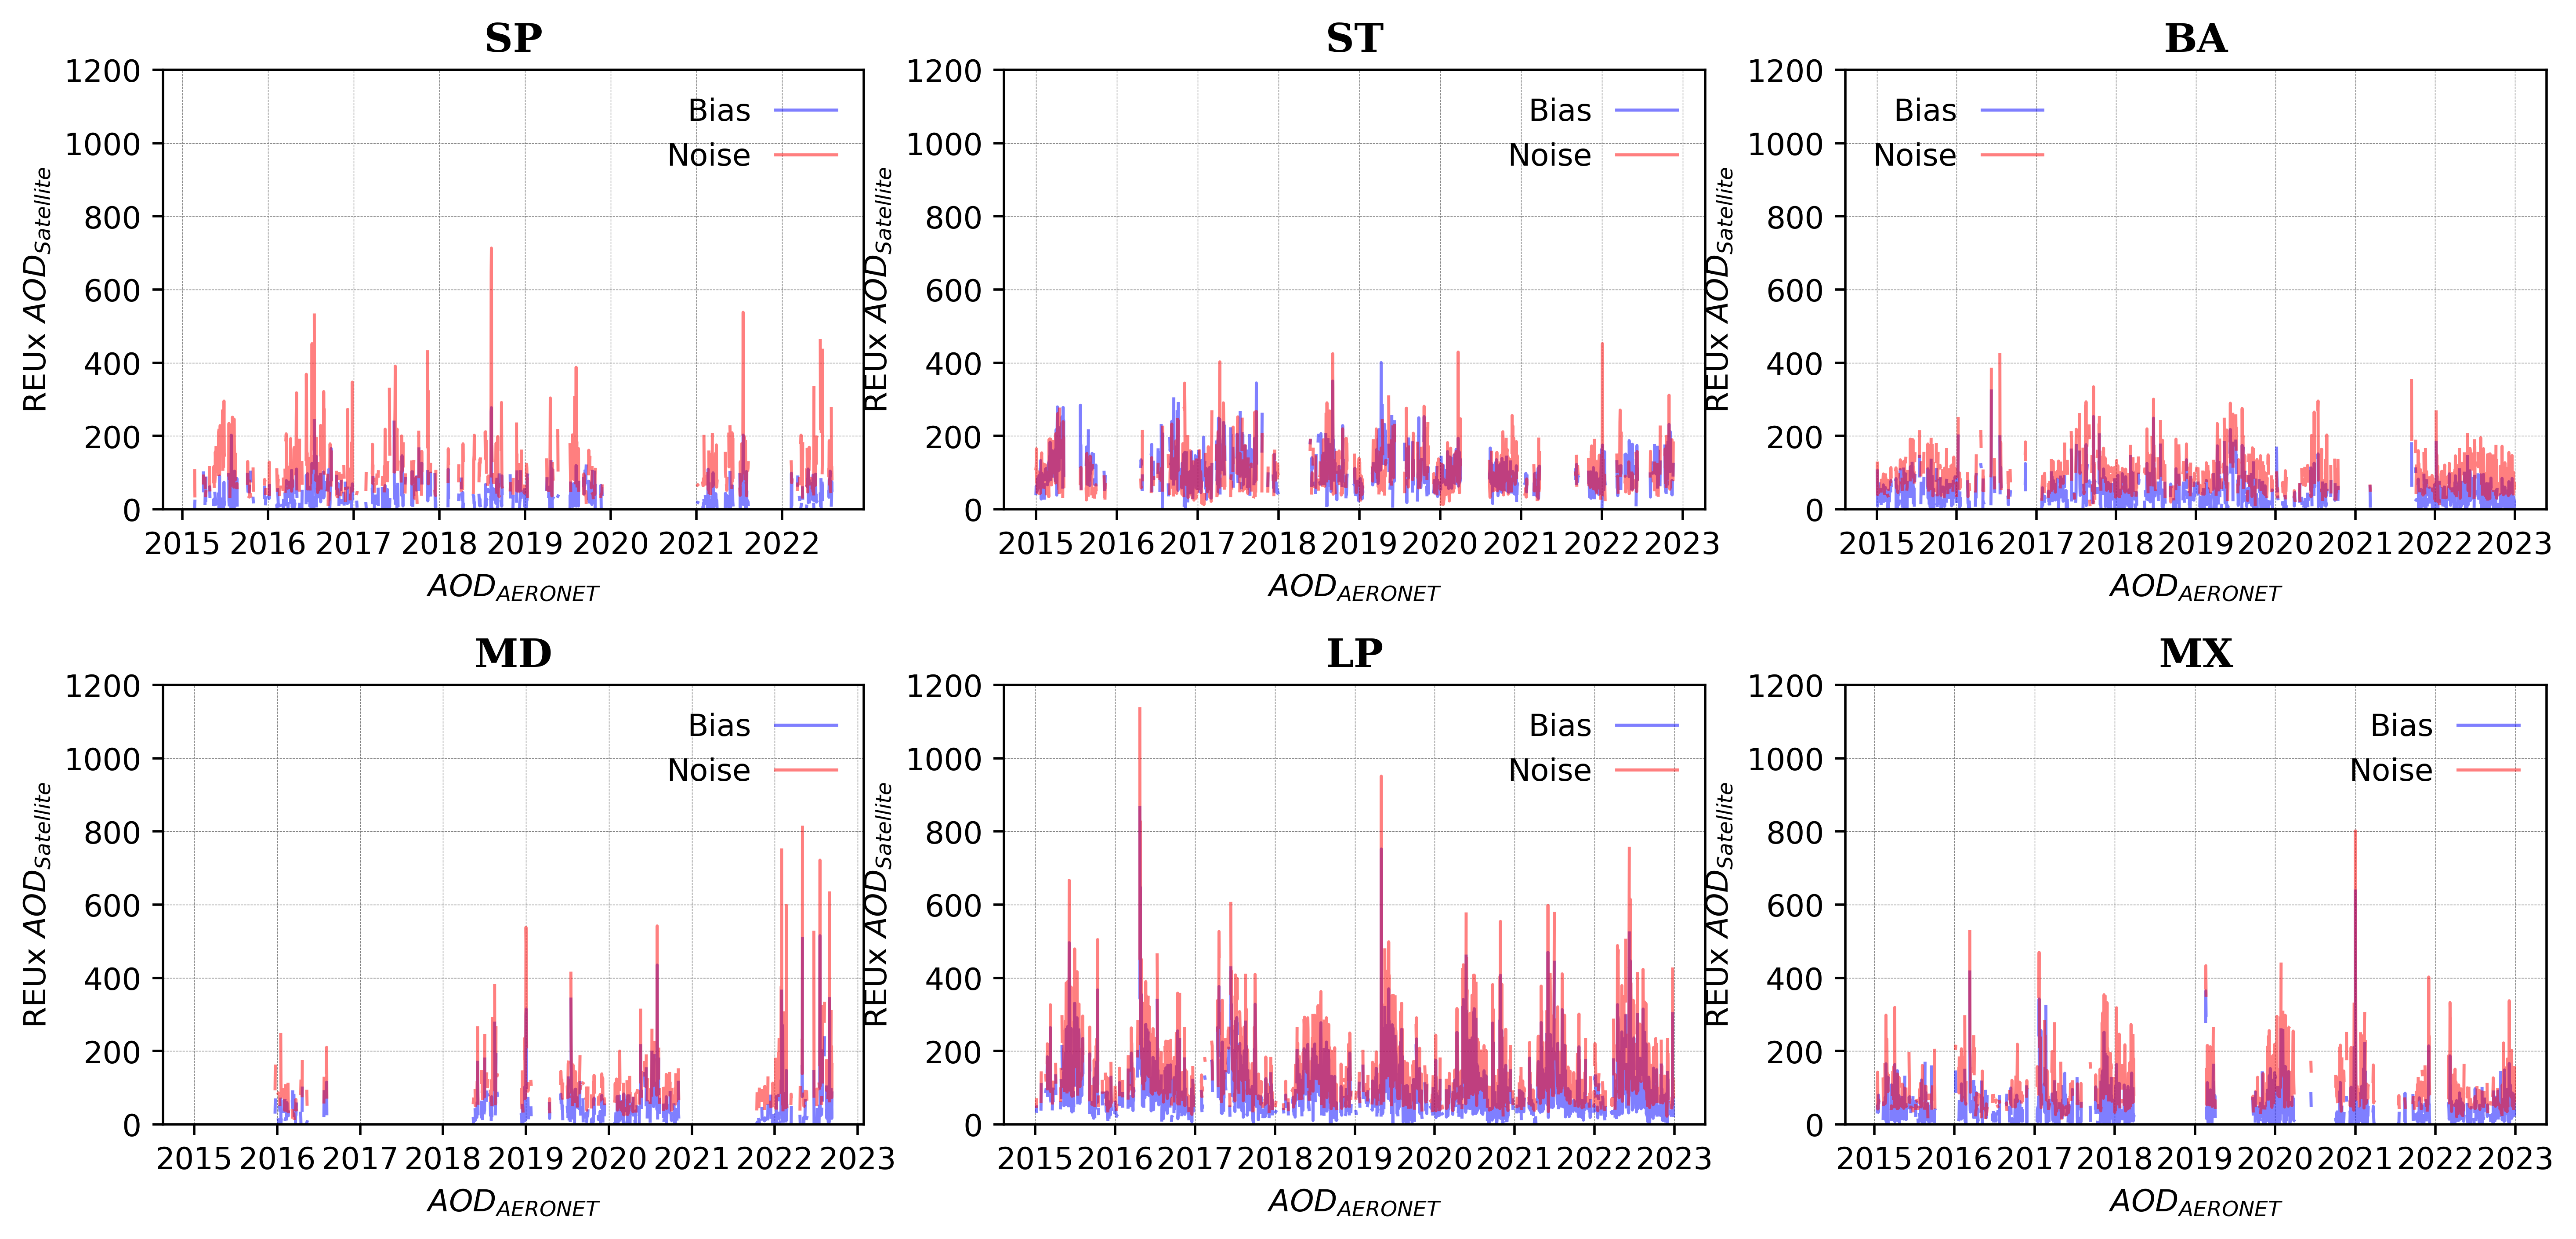

In [186]:
bias_varianza(path="D:/Josefina/paper_git/paper_maiac/datasets/processed/C6.1/dia/",date_format='%Y-%m-%d',nrows=2,ncols=3,plot = 'LALA')


In [194]:


# REU PLOT
def bias_varianza_scatter(path, date_format,nrows,ncols,plot):
    '''
    This function allows plotting the previously calculated REU. 
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
#     edge_color_maiac = ["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
#     edge_color_modis = ["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
#     edge_color_maiac61 = ["#e5f5e0","#fee391","#fdbb84","#a6bddb","#fa9fb5","#bcbddc"]
    #Mas oscuro
    color_maiac = ["#00441b","#662506" ,"#67000d","#081d58","#67001f","#3f007d"]
    #intermedio
    color_maiac61 = ["#41ae76","#ec7014","#ef3b2c","#045a8d","#ce1256","#807dba"]
    #Mas claro
    color_modis = ["#99d8c9","#feb24c","#fc9272", "#a6bddb" , "#fa9fb5","#dadaeb"]
    
    

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        
        
        df_REUxy = REU_OLS(DF = data, Pollutant = 'AOD_550_AER_mean', 
        Units = ["AOD_550_maiac_mean"], 
        Lambda = 1, u_xi = 0.0)
        # Station Name
        station_name = files [2:4]

        df_REUxy["date"] = df_REUxy["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))
        df_REUxy.set_index('date', inplace = True)
        df_REUxy  = df_REUxy.resample('1D').mean()
        #data_mean  = data.resample('1M').mean()
        #The days of the study period are completed
        df_REUxy = df_REUxy ['2015-01-01':'2022-12-31']

        ########################                PLOT                ########################
        # Figure
        #Scatter plot REU vs Ref
        ax[i][j].scatter(df_REUxy['AOD_550_AER_mean'], df_REUxy['b_AOD_550_maiac_mean'], s= 10,color="blue", alpha=0.2, linewidth=1,label="Bias") # Color
        ax[i][j].scatter(df_REUxy['AOD_550_AER_mean'], df_REUxy['n_AOD_550_maiac_mean'], s=10,color="red", alpha=0.2, linewidth=1,label="Noise") # Color
             
        ax[i][j].grid(color = 'grey', linestyle = '--', linewidth = 0.2)

        
   
        # Title of each subplot corresponds toY the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # X axis limit
#         ax[i][j].set_xlim(0,1.2) 
        # Y axis limit
        ax[i][j].set_ylim(0,1200)
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'Bias - Noise',size=10)
 
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        # Tittle legend
        #tittle_legend = ["MAIAC","MODIS"]
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10)
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    
       # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("REU_plot.jpg", dpi=500))
    else:
        return(plt.show())

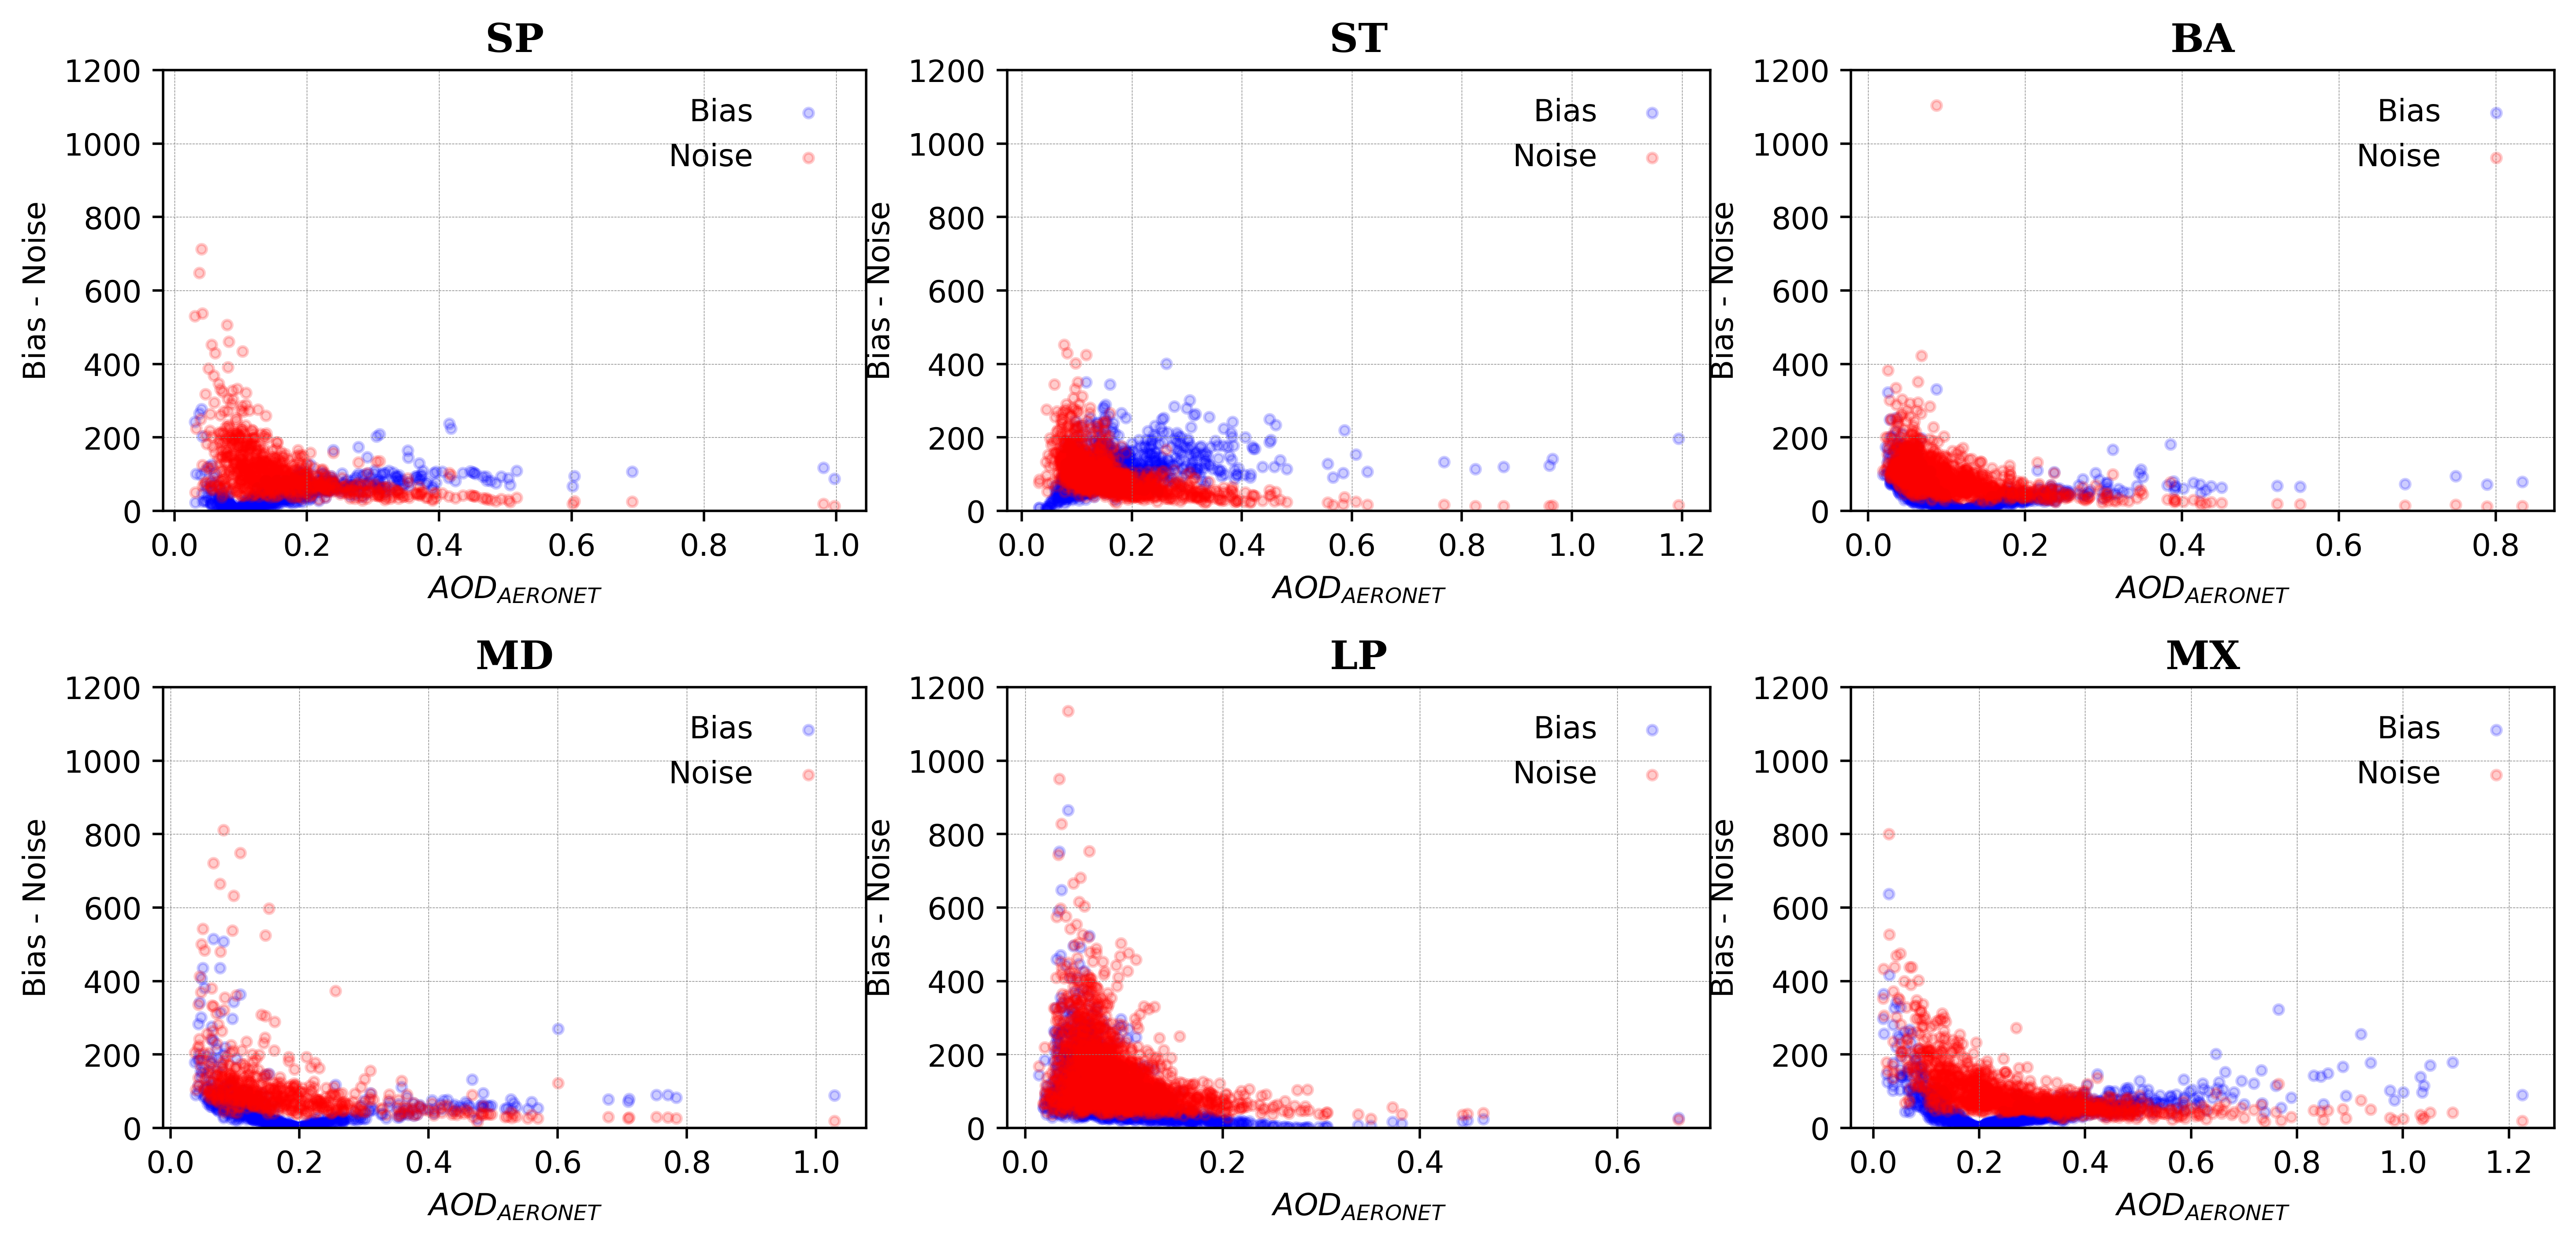

In [195]:
bias_varianza_scatter(path="D:/Josefina/paper_git/paper_maiac/datasets/processed/C6.1/dia/",date_format='%Y-%m-%d',nrows=2,ncols=3,plot = 'LALA')
